<a href="https://colab.research.google.com/github/PranjalMinocha/GoogleMaps-Distance/blob/main/GoogleMaps_Distance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [126]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

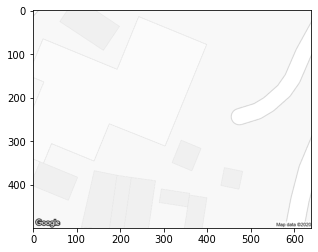

In [214]:
# white color mask
filename = "tmp_3.png"
img = cv2.imread("/content/drive/MyDrive/Python/GoogleMaps Road Distance/Images/" + filename)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap="gray")

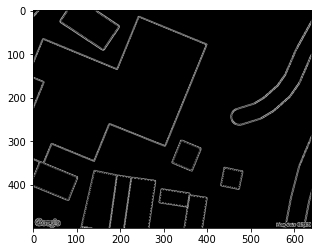

In [215]:
# Using canny to identify edges
edges = cv2.Canny(gray,50,150,apertureSize = 5)
plt.imshow(edges, cmap="gray")

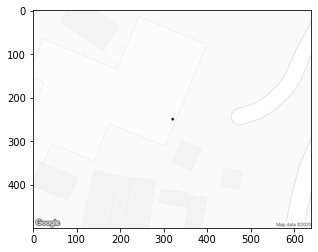

In [216]:
gray_anchor = gray.copy()
gray_anchor = cv2.circle(gray_anchor, (320,250), radius=0, color=0, thickness=6)
plt.imshow(gray_anchor, cmap = "gray")

In [217]:
# Anchor is the midpoint of image
clr_anchor = gray[250,320]
anchor_coord = np.array([250, 320])

In [218]:
# As objects already segmented, using colors to identify objects
clr_empty = 249
clr_shop = 251
clr_build = 243

# the color with highest brightness is road color
clrs = np.unique(gray[0:475,:]) # Cropping the google logo
clr_road = max(clrs)

In [219]:
inBuild = 1
if(clr_anchor == clr_shop):
  # anchor in a shop
  shopbound_coord = np.argwhere(edges == 255)
  dist = np.array([np.linalg.norm(x-anchor_coord) for x in shopbound_coord])
  # Finding 2 nearest boundary coords to get line equation
  coord = shopbound_coord[np.argmin(dist)]

elif(clr_anchor == clr_build):
  # anchor in a building
  buildbound_coord = np.argwhere(edges == 255)
  dist = [np.linalg.norm(x-anchor_coord) for x in buildbound_coord]
  # Finding 2 nearest boundary coords to get line equation
  coord = buildbound_coord[np.argmin(dist)]

else:
  coord = anchor_coord
  inBuild = 0

In [220]:
def get_line_dist(given_coord, anchor_coord, coord):
  return ((given_coord[1]-coord[1])*(coord[1]-anchor_coord[1]) + (given_coord[0]-coord[0])*(coord[0]-anchor_coord[0]))/pow(((coord[1]-anchor_coord[1])**2 + (coord[0]-anchor_coord[0])**2),0.5)

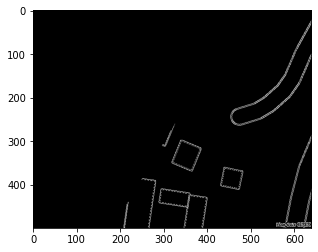

In [221]:
if(inBuild):
  # Filtering the canny image to consider only the points in the direction
  edges_filtered = np.zeros([500,640])
  anchor_dist = get_line_dist(anchor_coord, anchor_coord, coord)
  for i in range(500):
    for j in range(640):
      itr_dist = get_line_dist([i,j], anchor_coord, coord)
      sign = np.sign(anchor_dist*itr_dist)
      # Sign is negative if anchor and point are on opposite sides of line
      if(sign < 0 and abs(itr_dist) > 4):
        edges_filtered[i,j] = edges[i,j]
  edges = edges_filtered
  plt.imshow(edges, cmap = "gray")

In [222]:
white_coord = np.argwhere(edges == 255)
final_dist_arr = np.array([np.linalg.norm(x-coord) for x in white_coord])
final_dist = np.amin(final_dist_arr)
final_coord = white_coord[np.argmin(final_dist_arr)]

In [223]:
if(gray[final_coord[0], final_coord[1]] == clr_road):
  flag = "Road"
else:
  flag = "Building"

In [224]:
imgName = filename[:3] + filename[4]
print(imgName+" ,",final_dist, ","+flag)

tmp3 , 8.0 ,Building
